In [1]:
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import math
import random
import datetime as dt
import matplotlib.dates as mdates

import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import mean_squared_error



Import Data

In [2]:
df = pd.read_csv('C:/Users/yolau/OneDrive/Documents/TA/Kodingan/INCO.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-18,2900.0,2950.0,2880.0,2900.0,2834.681641,8315300.0
1,2017-12-19,2940.0,2940.0,2890.0,2920.0,2854.230957,4371500.0
2,2017-12-20,2900.0,2900.0,2830.0,2850.0,2785.807617,10485500.0
3,2017-12-21,2870.0,2890.0,2840.0,2840.0,2776.032959,5395600.0
4,2017-12-22,2840.0,2850.0,2790.0,2800.0,2736.934082,4185500.0


In [3]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1489,2023-12-08,4310.0,4430.0,4310.0,4360.0,4360.0,21184500.0
1490,2023-12-11,4360.0,4370.0,4190.0,4190.0,4190.0,23613000.0
1491,2023-12-12,4200.0,4250.0,4180.0,4220.0,4220.0,9989200.0
1492,2023-12-13,4220.0,4230.0,4010.0,4020.0,4020.0,25006200.0
1493,2023-12-14,4030.0,4220.0,4030.0,4170.0,4170.0,24832800.0


In [4]:
print("Are there any 'MISSING VALUES / NULL / NaN' in the Dataset?\nAnswer:", df.isnull().sum().values.any())

Are there any 'MISSING VALUES / NULL / NaN' in the Dataset?
Answer: True


In [5]:
# Menghitung jumlah nilai yang hilang per kolom
missing_values_count = df.isna().sum()

# Menampilkan jumlah nilai yang hilang
print(missing_values_count)

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64


In [6]:
df = df.dropna()

In [7]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-18,2900.0,2950.0,2880.0,2900.0,2834.681641,8315300.0
1,2017-12-19,2940.0,2940.0,2890.0,2920.0,2854.230957,4371500.0
2,2017-12-20,2900.0,2900.0,2830.0,2850.0,2785.807617,10485500.0
3,2017-12-21,2870.0,2890.0,2840.0,2840.0,2776.032959,5395600.0
4,2017-12-22,2840.0,2850.0,2790.0,2800.0,2736.934082,4185500.0
...,...,...,...,...,...,...,...
1489,2023-12-08,4310.0,4430.0,4310.0,4360.0,4360.000000,21184500.0
1490,2023-12-11,4360.0,4370.0,4190.0,4190.0,4190.000000,23613000.0
1491,2023-12-12,4200.0,4250.0,4180.0,4220.0,4220.000000,9989200.0
1492,2023-12-13,4220.0,4230.0,4010.0,4020.0,4020.000000,25006200.0


In [8]:
specific_df = df[['Date', 'Close', 'Open', 'High', 'Low']]

In [9]:
specific_df

,Date,Close,Open,High,Low
0,2017-12-18,2900.0,2900.0,2950.0,2880.0
1,2017-12-19,2920.0,2940.0,2940.0,2890.0
2,2017-12-20,2850.0,2900.0,2900.0,2830.0
3,2017-12-21,2840.0,2870.0,2890.0,2840.0
4,2017-12-22,2800.0,2840.0,2850.0,2790.0
...,...,...,...,...,...
1489,2023-12-08,4360.0,4310.0,4430.0,4310.0
1490,2023-12-11,4190.0,4360.0,4370.0,4190.0
1491,2023-12-12,4220.0,4200.0,4250.0,4180.0
1492,2023-12-13,4020.0,4220.0,4230.0,4010.0


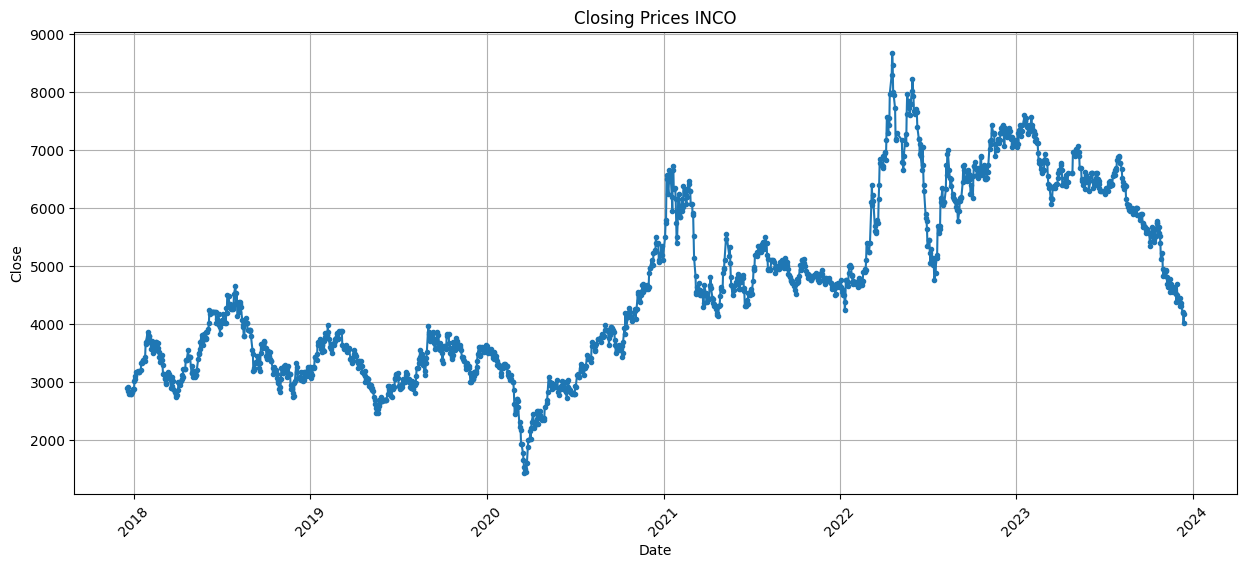

In [10]:
specific_df['Date'] = pd.to_datetime(specific_df['Date'])

plt.figure(figsize=(15,6))
plt.plot(specific_df['Date'], specific_df['Close'], marker='.')
plt.title('Closing Prices INCO')
plt.xlabel('Date')
plt.ylabel('Close')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

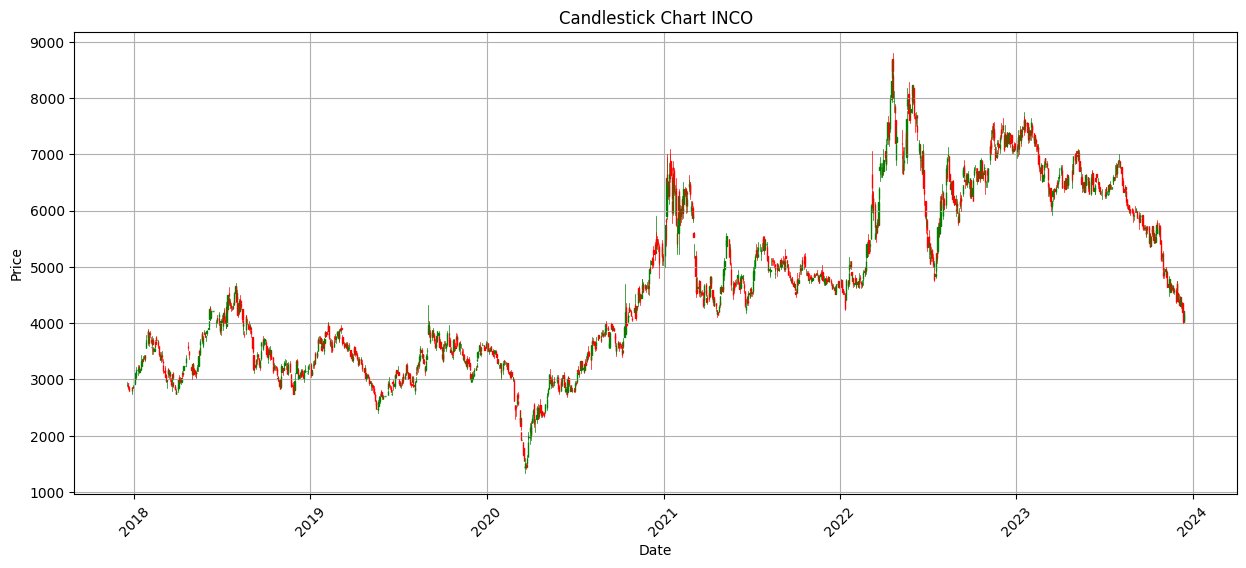

In [11]:
matplotlib_date = mdates.date2num(specific_df['Date'])

ohlc = np.vstack((matplotlib_date, specific_df['Open'], specific_df['High'], specific_df['Low'], specific_df['Close'])).T

plt.figure(figsize=(15,6))
ax = plt.subplot()
candlestick_ohlc(ax, ohlc, width=0.6, colorup='g', colordown='r')
ax.xaxis_date()
plt.title('Candlestick Chart INCO')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

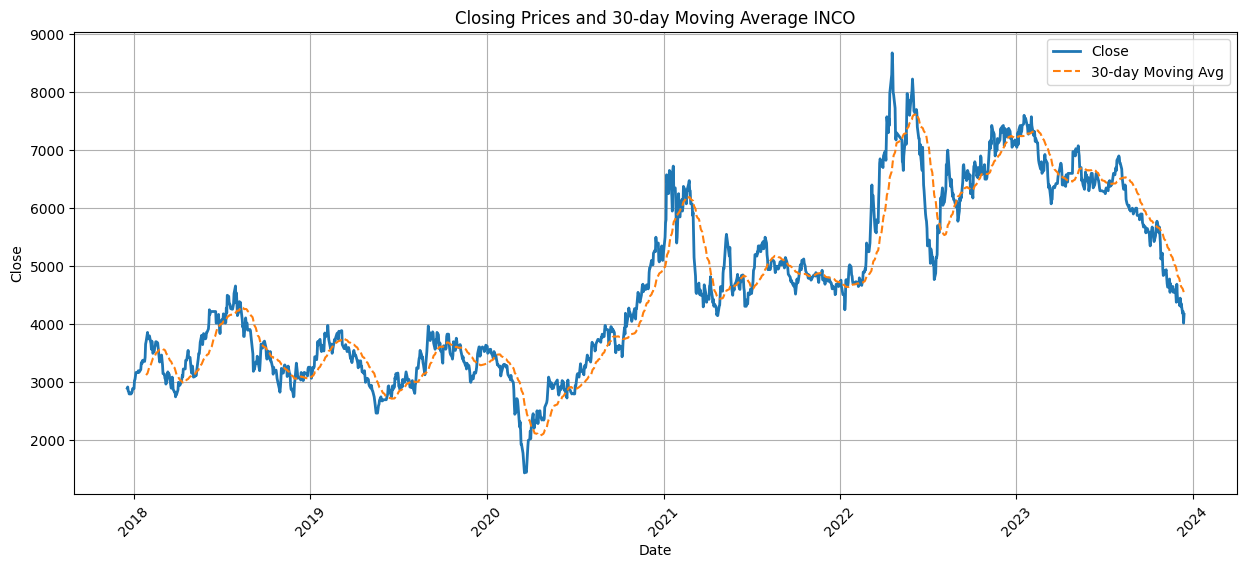

In [12]:
window = 30
plt.figure(figsize=(15,6))
plt.plot(specific_df['Date'], specific_df['Close'], label='Close', linewidth=2)
plt.plot(specific_df['Date'], specific_df['Close'].rolling(window=window).mean(),label=f'{window}-day Moving Avg', linestyle='--')
plt.title(f'Closing Prices and {window}-day Moving Average INCO')
plt.xlabel('Date')
plt.ylabel('Close')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [13]:
specific_df.head()

,Date,Close,Open,High,Low
0,2017-12-18,2900.0,2900.0,2950.0,2880.0
1,2017-12-19,2920.0,2940.0,2940.0,2890.0
2,2017-12-20,2850.0,2900.0,2900.0,2830.0
3,2017-12-21,2840.0,2870.0,2890.0,2840.0
4,2017-12-22,2800.0,2840.0,2850.0,2790.0


In [14]:
new_df = specific_df.reset_index()['Close']

In [15]:
new_df

0       2900.0
1       2920.0
2       2850.0
3       2840.0
4       2800.0
         ...  
1488    4360.0
1489    4190.0
1490    4220.0
1491    4020.0
1492    4170.0
Name: Close, Length: 1493, dtype: float64

In [16]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(np.array(new_df).reshape(-1,1))

Partisi Data

In [17]:
train_size = int(len(scaled_data)*0.8) #80% for training
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

In [18]:
n_past = 60

X_train, y_train = [], []
for i in range(n_past, len(train_data)):
    X_train.append(train_data[i - n_past:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_test, y_test = [], []
for i in range(n_past, len(test_data)):
    X_test.append(test_data[i - n_past:i, 0])
    y_test.append(test_data[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)

In [19]:
print("Training set size:-")
print(X_train.shape), print(y_train.shape)
print("\n")
print("Testing set size:-")
print(X_test.shape), print(y_test.shape)

Training set size:-
(1134, 60)
(1134,)


Testing set size:-
(239, 60)
(239,)


(None, None)

In [20]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

Layer = 3

Dropout = 0.9

In [21]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.9))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.9))

model.add(LSTM(units=50))
model.add(Dropout(0.9))

model.add(Dense(units=1))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

In [23]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [24]:
checkpoints = ModelCheckpoint(filepath= 'inco.h5', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model.fit(X_train,y_train,
          validation_data=(X_test,y_test),
          epochs=100,
          batch_size=32,
          verbose=1,
          callbacks=[checkpoints,early_stopping])

Epoch 1/100

36/36 [==============================] - 10s 107ms/step - loss: 0.0791 - val_loss: 0.0446
Epoch 2/100
36/36 [==============================] - 2s 58ms/step - loss: 0.0475 - val_loss: 0.0575
Epoch 3/100
36/36 [==============================] - 2s 57ms/step - loss: 0.0389 - val_loss: 0.0263
Epoch 4/100
36/36 [==============================] - 2s 59ms/step - loss: 0.0314 - val_loss: 0.0068
Epoch 5/100
36/36 [==============================] - 2s 61ms/step - loss: 0.0266 - val_loss: 0.0163
Epoch 6/100
36/36 [==============================] - 2s 54ms/step - loss: 0.0247 - val_loss: 0.0132
Epoch 7/100
36/36 [==============================] - 2s 52ms/step - loss: 0.0227 - val_loss: 0.0210
Epoch 8/100
36/36 [==============================] - 3s 72ms/step - loss: 0.0173 - val_loss: 0.0055
Epoch 9/100
36/36 [==============================] - 2s 60ms/step - loss: 0.0199 - val_loss: 0.0223
Epoch 10/100
36/36 [==============================] - 2s 56ms/step - loss: 0.0194 - val_loss: 0.0

In [25]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

8/8 [==============================] - 0s 26ms/step


In [26]:
#train_predict=scaler.inverse_transform(train_predict)
#test_predict=scaler.inverse_transform(test_predict)


In [27]:
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(y_test,test_predict)))

0.04940441816630463
0.04200275278543564


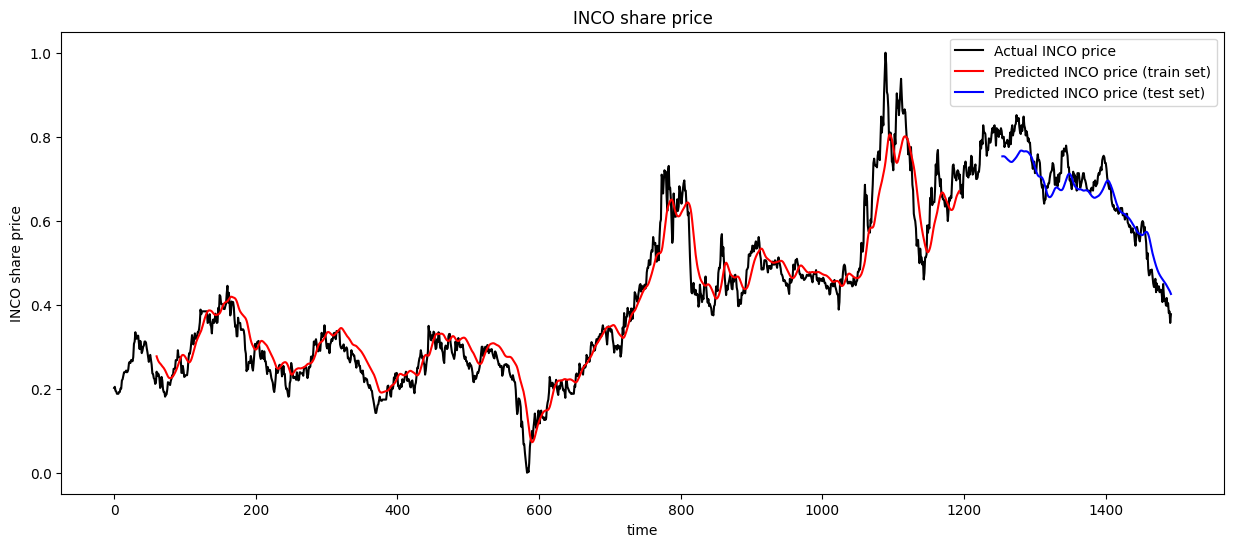

In [28]:
look_back = 60

trainPredictPlot = np.empty_like(new_df)
trainPredictPlot[:]= np.nan
trainPredictPlot[look_back:len(train_predict)+look_back]= train_predict.flatten()

testPredictPlot = np.empty_like(new_df)
testPredictPlot[:] = np.nan
test_start = len(new_df) - len(test_predict)
testPredictPlot[test_start:]= test_predict.flatten()

plt.figure(figsize=(15,6))
plt.plot(scaled_data, color='black', label=f"Actual INCO price")
plt.plot(trainPredictPlot, color='red', label=f"Predicted INCO price (train set)")
plt.plot(testPredictPlot, color='blue', label=f"Predicted INCO price (test set)")

plt.title(f"INCO share price")
plt.xlabel("time")
plt.ylabel(f"INCO share price")
plt.legend()
plt.show()

In [29]:
last_sequence = X_test[-1]
last_sequence = last_sequence.reshape(1, n_past, 1)

prediction_next_30_days = []

for _ in range(30):
    next_day_prediction = model.predict(last_sequence)
    prediction_next_30_days.append(next_day_prediction[0, 0])
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[0, -1, 0] = next_day_prediction

prediction_next_30_days = scaler.inverse_transform(np.array(prediction_next_30_days).reshape(-1, 1))

print("Predictions for the next 30 days:")
for i, prediction in enumerate(prediction_next_30_days, start=1):
    print(f"Day {i}: Predicted Price = {prediction[0]}")


1/1 [==============================] - 0s 47ms/step
Predictions for the next 30 days:
Day 1: Predicted Price = 4519.3583984375
Day 2: Predicted Price = 4494.5048828125
Day 3: Predicted Price = 4479.43408203125
Day 4: Predicted Price = 4474.06982421875
Day 5: Predicted Price = 4476.52099609375
Day 6: Predicted Price = 4484.40869140625
Day 7: Predicted Price = 4495.5634765625
Day 8: Predicted Price = 4508.32177734375
Day 9: Predicted Price = 4521.56298828125
Day 10: Predicted Price = 4534.61962890625
Day 11: Predicted Price = 4547.1689453125
Day 12: Predicted Price = 4559.0986328125
Day 13: Predicted Price = 4570.41943359375
Day 14: Predicted Price = 4581.208984375
Day 15: Predicted Price = 4591.568359375
Day 16: Predicted Price = 4601.58935546875
Day 17: Predicted Price = 4611.34521484375
Day 18: Predicted Price = 4620.892578125
Day 19: Predicted Price = 4630.26953125
Day 20: Predicted Price = 4639.50390625
Day 21: Predicted Price = 4648.615234375
Day 22: Predicted Price = 4657.62011718

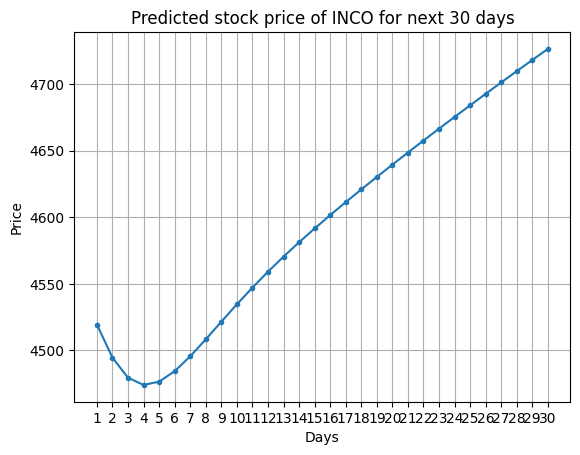

In [30]:
plt.plot(prediction_next_30_days, marker='.')
plt.title(f'Predicted stock price of INCO for next 30 days')
plt.xlabel('Days')
plt.ylabel('Price')
plt.xticks(range(0, 30), ['1','2','3','4','5','6','7','8','9','10',
                          '11','12','13','14','15','16','17','18','19','20',
                          '21','22','23','24','25','26','27','28','29','30'])
plt.grid(True)
plt.show()

In [31]:
# Evaluasi model
val_loss = model.evaluate(X_test, y_test)

print(f'Validation Loss: {val_loss}')

# Jika Anda memerlukan nilai MSE juga
val_mse = val_loss  # karena val_loss langsung berisi MSE
print(f'Validation MSE Loss: {val_mse}')



8/8 [==============================] - 0s 20ms/step - loss: 0.0018
Validation Loss: 0.0017642313614487648
Validation MSE Loss: 0.0017642313614487648


In [32]:
# Menghitung dan mencetak RMSE untuk data latih
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
print(f'Training RMSE: {train_rmse}')

# Menghitung dan mencetak RMSE untuk data uji
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print(f'Testing RMSE: {test_rmse}')

Training RMSE: 0.04940441816630463
Testing RMSE: 0.04200275278543564


dropout =0.8

In [33]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.8))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.8))

model.add(LSTM(units=50))
model.add(Dropout(0.8))

model.add(Dense(units=1))

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_3 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_4 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [35]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [36]:
checkpoints = ModelCheckpoint(filepath= 'inco.h5', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model.fit(X_train,y_train,
          validation_data=(X_test,y_test),
          epochs=100,
          batch_size=32,
          verbose=1,
          callbacks=[checkpoints,early_stopping])

Epoch 1/100
36/36 [==============================] - 21s 329ms/step - loss: 0.0475 - val_loss: 0.0268
Epoch 2/100
36/36 [==============================] - 3s 82ms/step - loss: 0.0244 - val_loss: 0.0038
Epoch 3/100
36/36 [==============================] - 3s 90ms/step - loss: 0.0210 - val_loss: 0.0029
Epoch 4/100
36/36 [==============================] - 3s 92ms/step - loss: 0.0212 - val_loss: 0.0019
Epoch 5/100
36/36 [==============================] - 3s 92ms/step - loss: 0.0150 - val_loss: 0.0057
Epoch 6/100
36/36 [==============================] - 3s 91ms/step - loss: 0.0139 - val_loss: 0.0127
Epoch 7/100
36/36 [==============================] - 3s 77ms/step - loss: 0.0144 - val_loss: 0.0026
Epoch 8/100
36/36 [==============================] - 3s 74ms/step - loss: 0.0129 - val_loss: 0.0037
Epoch 9/100
36/36 [==============================] - 3s 79ms/step - loss: 0.0129 - val_loss: 0.0030
Epoch 10/100
36/36 [==============================] - 3s 76ms/step - loss: 0.0115 - val_loss: 0.00

In [37]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

8/8 [==============================] - 0s 22ms/step


In [38]:
#train_predict=scaler.inverse_transform(train_predict)
#test_predict=scaler.inverse_transform(test_predict)


In [39]:
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(y_test,test_predict)))

0.0466935066175803
0.035338818087268804


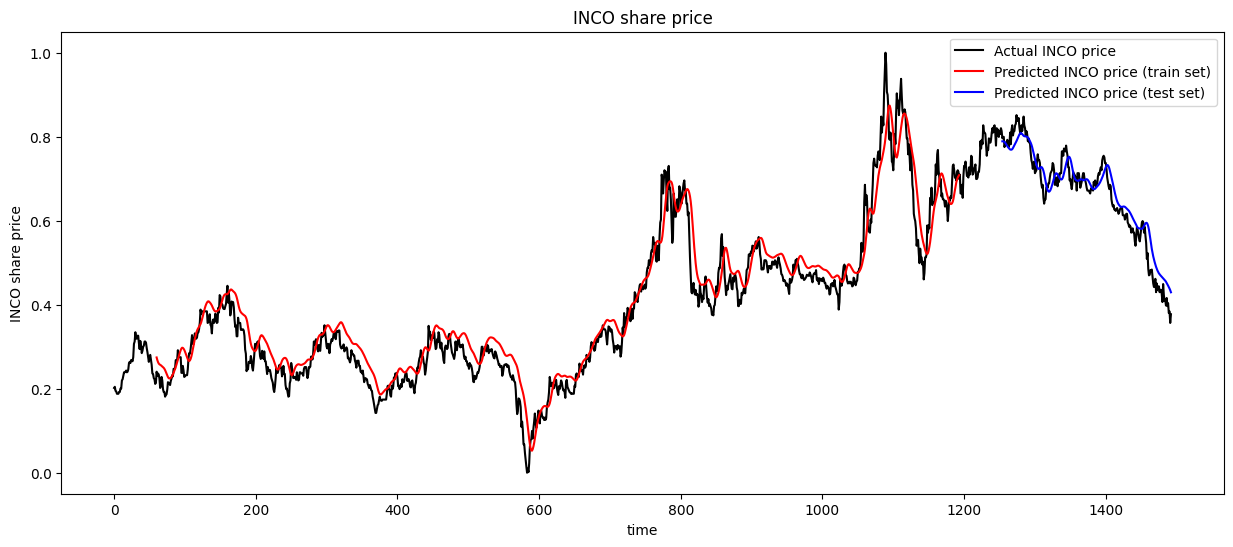

In [40]:
look_back = 60

trainPredictPlot = np.empty_like(new_df)
trainPredictPlot[:]= np.nan
trainPredictPlot[look_back:len(train_predict)+look_back]= train_predict.flatten()

testPredictPlot = np.empty_like(new_df)
testPredictPlot[:] = np.nan
test_start = len(new_df) - len(test_predict)
testPredictPlot[test_start:]= test_predict.flatten()

plt.figure(figsize=(15,6))
plt.plot(scaled_data, color='black', label=f"Actual INCO price")
plt.plot(trainPredictPlot, color='red', label=f"Predicted INCO price (train set)")
plt.plot(testPredictPlot, color='blue', label=f"Predicted INCO price (test set)")

plt.title(f"INCO share price")
plt.xlabel("time")
plt.ylabel(f"INCO share price")
plt.legend()
plt.show()

In [41]:
last_sequence = X_test[-1]
last_sequence = last_sequence.reshape(1, n_past, 1)

prediction_next_30_days = []

for _ in range(30):
    next_day_prediction = model.predict(last_sequence)
    prediction_next_30_days.append(next_day_prediction[0, 0])
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[0, -1, 0] = next_day_prediction

prediction_next_30_days = scaler.inverse_transform(np.array(prediction_next_30_days).reshape(-1, 1))

print("Predictions for the next 30 days:")
for i, prediction in enumerate(prediction_next_30_days, start=1):
    print(f"Day {i}: Predicted Price = {prediction[0]}")


1/1 [==============================] - 0s 63ms/step
Predictions for the next 30 days:
Day 1: Predicted Price = 4548.02294921875
Day 2: Predicted Price = 4521.02001953125
Day 3: Predicted Price = 4508.51318359375
Day 4: Predicted Price = 4510.92236328125
Day 5: Predicted Price = 4525.72607421875
Day 6: Predicted Price = 4549.39111328125
Day 7: Predicted Price = 4578.53662109375
Day 8: Predicted Price = 4610.482421875
Day 9: Predicted Price = 4643.3857421875
Day 10: Predicted Price = 4676.1455078125
Day 11: Predicted Price = 4708.21484375
Day 12: Predicted Price = 4739.41064453125
Day 13: Predicted Price = 4769.7490234375
Day 14: Predicted Price = 4799.3349609375
Day 15: Predicted Price = 4828.29296875
Day 16: Predicted Price = 4856.73291015625
Day 17: Predicted Price = 4884.7373046875
Day 18: Predicted Price = 4912.35986328125
Day 19: Predicted Price = 4939.63427734375
Day 20: Predicted Price = 4966.57861328125
Day 21: Predicted Price = 4993.20263671875
Day 22: Predicted Price = 5019.51

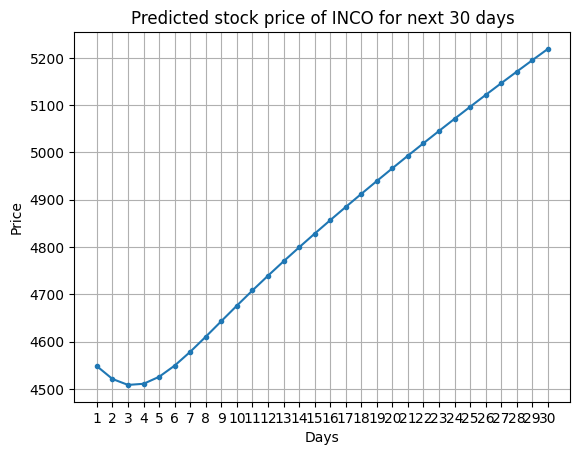

In [42]:
plt.plot(prediction_next_30_days, marker='.')
plt.title(f'Predicted stock price of INCO for next 30 days')
plt.xlabel('Days')
plt.ylabel('Price')
plt.xticks(range(0, 30), ['1','2','3','4','5','6','7','8','9','10',
                          '11','12','13','14','15','16','17','18','19','20',
                          '21','22','23','24','25','26','27','28','29','30'])
plt.grid(True)
plt.show()

In [43]:
# Evaluasi model
val_loss = model.evaluate(X_test, y_test)

print(f'Validation Loss: {val_loss}')

# Jika Anda memerlukan nilai MSE juga
val_mse = val_loss  # karena val_loss langsung berisi MSE
print(f'Validation MSE Loss: {val_mse}')



8/8 [==============================] - 0s 21ms/step - loss: 0.0012
Validation Loss: 0.0012488322099670768
Validation MSE Loss: 0.0012488322099670768


In [44]:
# Menghitung dan mencetak RMSE untuk data latih
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
print(f'Training RMSE: {train_rmse}')

# Menghitung dan mencetak RMSE untuk data uji
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print(f'Testing RMSE: {test_rmse}')

Training RMSE: 0.0466935066175803
Testing RMSE: 0.035338818087268804


dropout = 0.7

In [45]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.7))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.7))

model.add(LSTM(units=50))
model.add(Dropout(0.7))

model.add(Dense(units=1))

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_6 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_7 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_8 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                

In [47]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [48]:
checkpoints = ModelCheckpoint(filepath= 'inco.h5', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model.fit(X_train,y_train,
          validation_data=(X_test,y_test),
          epochs=100,
          batch_size=32,
          verbose=1,
          callbacks=[checkpoints,early_stopping])

Epoch 1/100
36/36 [==============================] - 22s 164ms/step - loss: 0.0421 - val_loss: 0.0095
Epoch 2/100
36/36 [==============================] - 2s 68ms/step - loss: 0.0166 - val_loss: 0.0073
Epoch 3/100
36/36 [==============================] - 3s 71ms/step - loss: 0.0160 - val_loss: 0.0019
Epoch 4/100
36/36 [==============================] - 2s 67ms/step - loss: 0.0142 - val_loss: 0.0043
Epoch 5/100
36/36 [==============================] - 3s 72ms/step - loss: 0.0115 - val_loss: 0.0027
Epoch 6/100
36/36 [==============================] - 2s 67ms/step - loss: 0.0108 - val_loss: 0.0027
Epoch 7/100
36/36 [==============================] - 3s 70ms/step - loss: 0.0109 - val_loss: 0.0050
Epoch 8/100
36/36 [==============================] - 2s 66ms/step - loss: 0.0099 - val_loss: 0.0060
Epoch 9/100
36/36 [==============================] - 2s 69ms/step - loss: 0.0089 - val_loss: 0.0028
Epoch 10/100
36/36 [==============================] - 2s 65ms/step - loss: 0.0084 - val_loss: 0.00

In [49]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

8/8 [==============================] - 0s 17ms/step


In [50]:
#train_predict=scaler.inverse_transform(train_predict)
#test_predict=scaler.inverse_transform(test_predict)


In [51]:
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(y_test,test_predict)))

0.04294850823514821
0.02451293801300314


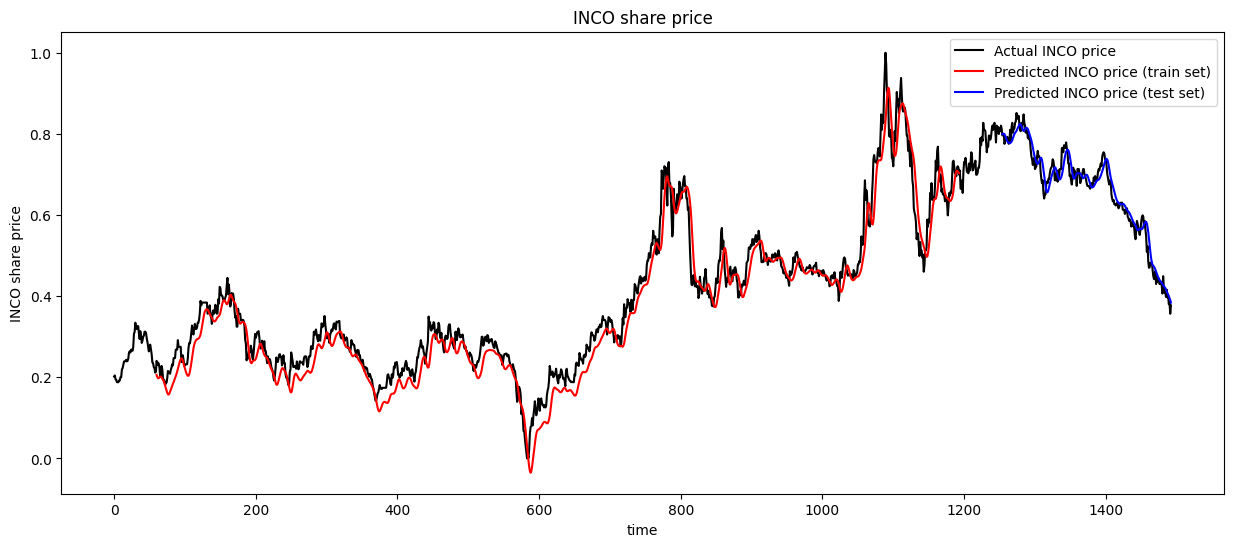

In [52]:
look_back = 60

trainPredictPlot = np.empty_like(new_df)
trainPredictPlot[:]= np.nan
trainPredictPlot[look_back:len(train_predict)+look_back]= train_predict.flatten()

testPredictPlot = np.empty_like(new_df)
testPredictPlot[:] = np.nan
test_start = len(new_df) - len(test_predict)
testPredictPlot[test_start:]= test_predict.flatten()

plt.figure(figsize=(15,6))
plt.plot(scaled_data, color='black', label=f"Actual INCO price")
plt.plot(trainPredictPlot, color='red', label=f"Predicted INCO price (train set)")
plt.plot(testPredictPlot, color='blue', label=f"Predicted INCO price (test set)")

plt.title(f"INCO share price")
plt.xlabel("time")
plt.ylabel(f"INCO share price")
plt.legend()
plt.show()

In [53]:
last_sequence = X_test[-1]
last_sequence = last_sequence.reshape(1, n_past, 1)

prediction_next_30_days = []

for _ in range(30):
    next_day_prediction = model.predict(last_sequence)
    prediction_next_30_days.append(next_day_prediction[0, 0])
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[0, -1, 0] = next_day_prediction

prediction_next_30_days = scaler.inverse_transform(np.array(prediction_next_30_days).reshape(-1, 1))

print("Predictions for the next 30 days:")
for i, prediction in enumerate(prediction_next_30_days, start=1):
    print(f"Day {i}: Predicted Price = {prediction[0]}")


1/1 [==============================] - 0s 32ms/step
Predictions for the next 30 days:
Day 1: Predicted Price = 4219.41455078125
Day 2: Predicted Price = 4174.0576171875
Day 3: Predicted Price = 4136.06396484375
Day 4: Predicted Price = 4106.2509765625
Day 5: Predicted Price = 4082.908935546875
Day 6: Predicted Price = 4063.531494140625
Day 7: Predicted Price = 4045.826904296875
Day 8: Predicted Price = 4028.141357421875
Day 9: Predicted Price = 4009.51416015625
Day 10: Predicted Price = 3989.536865234375
Day 11: Predicted Price = 3968.167236328125
Day 12: Predicted Price = 3945.550048828125
Day 13: Predicted Price = 3921.894287109375
Day 14: Predicted Price = 3897.403076171875
Day 15: Predicted Price = 3872.236328125
Day 16: Predicted Price = 3846.504150390625
Day 17: Predicted Price = 3820.272705078125
Day 18: Predicted Price = 3793.572509765625
Day 19: Predicted Price = 3766.41357421875
Day 20: Predicted Price = 3738.7900390625
Day 21: Predicted Price = 3710.688720703125
Day 22: Pred

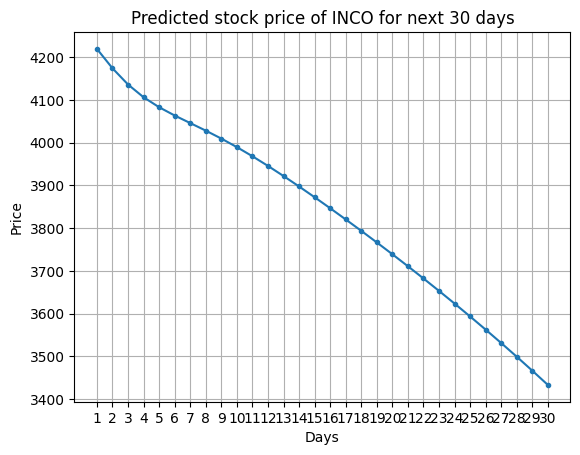

In [54]:
plt.plot(prediction_next_30_days, marker='.')
plt.title(f'Predicted stock price of INCO for next 30 days')
plt.xlabel('Days')
plt.ylabel('Price')
plt.xticks(range(0, 30), ['1','2','3','4','5','6','7','8','9','10',
                          '11','12','13','14','15','16','17','18','19','20',
                          '21','22','23','24','25','26','27','28','29','30'])
plt.grid(True)
plt.show()

In [55]:
# Evaluasi model
val_loss = model.evaluate(X_test, y_test)

print(f'Validation Loss: {val_loss}')

# Jika Anda memerlukan nilai MSE juga
val_mse = val_loss  # karena val_loss langsung berisi MSE
print(f'Validation MSE Loss: {val_mse}')



8/8 [==============================] - 0s 19ms/step - loss: 6.0088e-04
Validation Loss: 0.0006008840864524245
Validation MSE Loss: 0.0006008840864524245


In [56]:
# Menghitung dan mencetak RMSE untuk data latih
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
print(f'Training RMSE: {train_rmse}')

# Menghitung dan mencetak RMSE untuk data uji
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print(f'Testing RMSE: {test_rmse}')

Training RMSE: 0.04294850823514821
Testing RMSE: 0.02451293801300314


dropout =  0.6

In [57]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.6))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.6))

model.add(LSTM(units=50))
model.add(Dropout(0.6))

model.add(Dense(units=1))

In [58]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_9 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_10 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_10 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_11 (Dropout)        (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [59]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [60]:
checkpoints = ModelCheckpoint(filepath= 'inco.h5', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model.fit(X_train,y_train,
          validation_data=(X_test,y_test),
          epochs=100,
          batch_size=32,
          verbose=1,
          callbacks=[checkpoints,early_stopping])

Epoch 1/100
36/36 [==============================] - 9s 101ms/step - loss: 0.0333 - val_loss: 0.0091
Epoch 2/100
36/36 [==============================] - 2s 56ms/step - loss: 0.0135 - val_loss: 0.0021
Epoch 3/100
36/36 [==============================] - 2s 56ms/step - loss: 0.0119 - val_loss: 0.0016
Epoch 4/100
36/36 [==============================] - 2s 54ms/step - loss: 0.0096 - val_loss: 0.0016
Epoch 5/100
36/36 [==============================] - 2s 54ms/step - loss: 0.0106 - val_loss: 0.0028
Epoch 6/100
36/36 [==============================] - 2s 56ms/step - loss: 0.0084 - val_loss: 0.0062
Epoch 7/100
36/36 [==============================] - 2s 53ms/step - loss: 0.0087 - val_loss: 0.0047
Epoch 8/100
36/36 [==============================] - 2s 54ms/step - loss: 0.0077 - val_loss: 0.0015
Epoch 9/100
36/36 [==============================] - 2s 55ms/step - loss: 0.0077 - val_loss: 0.0016
Epoch 10/100
36/36 [==============================] - 2s 69ms/step - loss: 0.0072 - val_loss: 0.002

In [61]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

8/8 [==============================] - 0s 18ms/step


In [62]:
#train_predict=scaler.inverse_transform(train_predict)
#test_predict=scaler.inverse_transform(test_predict)


In [63]:
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(y_test,test_predict)))

0.027431396278413324
0.020309690040302805


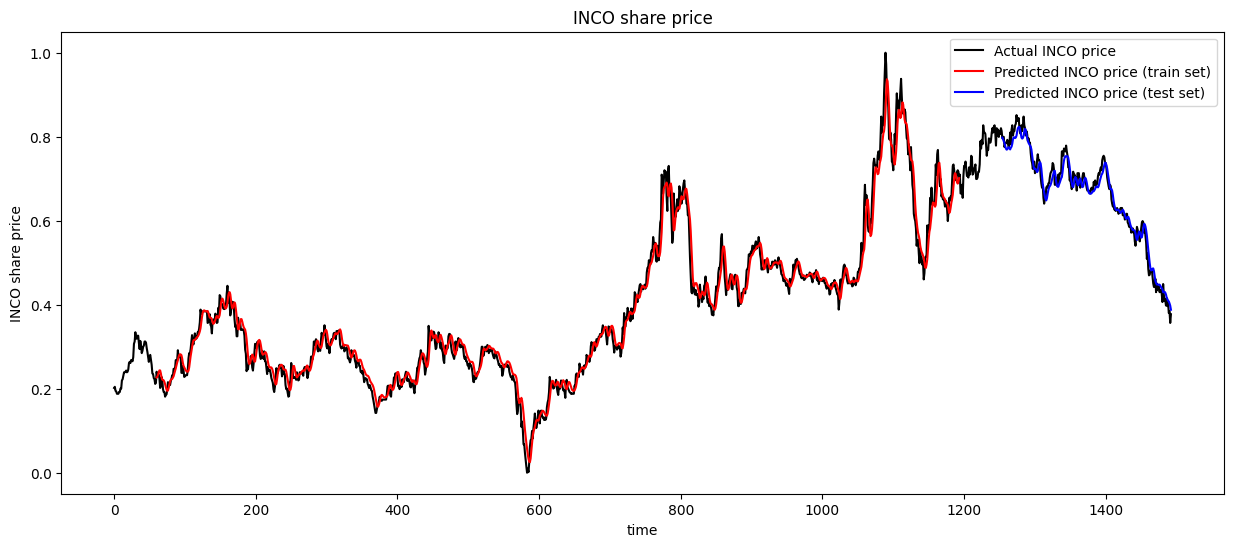

In [64]:
look_back = 60

trainPredictPlot = np.empty_like(new_df)
trainPredictPlot[:]= np.nan
trainPredictPlot[look_back:len(train_predict)+look_back]= train_predict.flatten()

testPredictPlot = np.empty_like(new_df)
testPredictPlot[:] = np.nan
test_start = len(new_df) - len(test_predict)
testPredictPlot[test_start:]= test_predict.flatten()

plt.figure(figsize=(15,6))
plt.plot(scaled_data, color='black', label=f"Actual INCO price")
plt.plot(trainPredictPlot, color='red', label=f"Predicted INCO price (train set)")
plt.plot(testPredictPlot, color='blue', label=f"Predicted INCO price (test set)")

plt.title(f"INCO share price")
plt.xlabel("time")
plt.ylabel(f"INCO share price")
plt.legend()
plt.show()

In [65]:
last_sequence = X_test[-1]
last_sequence = last_sequence.reshape(1, n_past, 1)

prediction_next_30_days = []

for _ in range(30):
    next_day_prediction = model.predict(last_sequence)
    prediction_next_30_days.append(next_day_prediction[0, 0])
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[0, -1, 0] = next_day_prediction

prediction_next_30_days = scaler.inverse_transform(np.array(prediction_next_30_days).reshape(-1, 1))

print("Predictions for the next 30 days:")
for i, prediction in enumerate(prediction_next_30_days, start=1):
    print(f"Day {i}: Predicted Price = {prediction[0]}")


1/1 [==============================] - 0s 31ms/step
Predictions for the next 30 days:
Day 1: Predicted Price = 4247.21826171875
Day 2: Predicted Price = 4207.6318359375
Day 3: Predicted Price = 4202.47216796875
Day 4: Predicted Price = 4218.15771484375
Day 5: Predicted Price = 4241.0556640625
Day 6: Predicted Price = 4262.97705078125
Day 7: Predicted Price = 4280.82177734375
Day 8: Predicted Price = 4294.525390625
Day 9: Predicted Price = 4305.236328125
Day 10: Predicted Price = 4314.2294921875
Day 11: Predicted Price = 4322.4658203125
Day 12: Predicted Price = 4330.5126953125
Day 13: Predicted Price = 4338.63330078125
Day 14: Predicted Price = 4346.90185546875
Day 15: Predicted Price = 4355.298828125
Day 16: Predicted Price = 4363.7734375
Day 17: Predicted Price = 4372.27392578125
Day 18: Predicted Price = 4380.76123046875
Day 19: Predicted Price = 4389.2080078125
Day 20: Predicted Price = 4397.60009765625
Day 21: Predicted Price = 4405.9296875
Day 22: Predicted Price = 4414.1953125
D

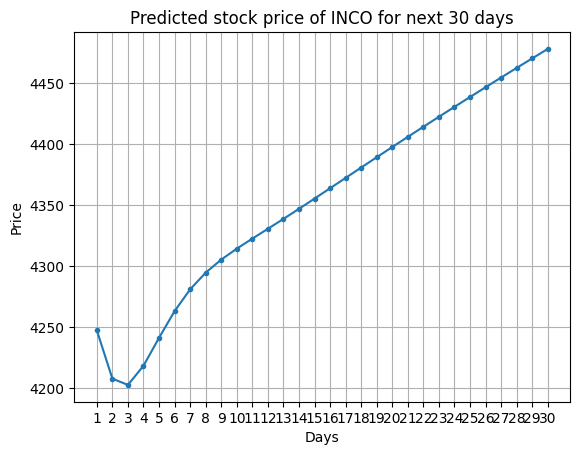

In [66]:
plt.plot(prediction_next_30_days, marker='.')
plt.title(f'Predicted stock price of INCO for next 30 days')
plt.xlabel('Days')
plt.ylabel('Price')
plt.xticks(range(0, 30), ['1','2','3','4','5','6','7','8','9','10',
                          '11','12','13','14','15','16','17','18','19','20',
                          '21','22','23','24','25','26','27','28','29','30'])
plt.grid(True)
plt.show()

In [67]:
# Evaluasi model
val_loss = model.evaluate(X_test, y_test)

print(f'Validation Loss: {val_loss}')

# Jika Anda memerlukan nilai MSE juga
val_mse = val_loss  # karena val_loss langsung berisi MSE
print(f'Validation MSE Loss: {val_mse}')



8/8 [==============================] - 0s 18ms/step - loss: 4.1248e-04
Validation Loss: 0.00041248349589295685
Validation MSE Loss: 0.00041248349589295685


In [68]:
# Menghitung dan mencetak RMSE untuk data latih
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
print(f'Training RMSE: {train_rmse}')

# Menghitung dan mencetak RMSE untuk data uji
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print(f'Testing RMSE: {test_rmse}')

Training RMSE: 0.027431396278413324
Testing RMSE: 0.020309690040302805


: 